In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['test.csv', 'data_description.txt', 'train.csv', 'sample_submission.csv']


In [2]:
#Loading Data
test = pd.read_csv("../input/test.csv")
train = pd.read_csv("../input/train.csv")


In [3]:
#test.info()
test.shape #(1459, 80)
train.shape #(1460, 81)

a = train.columns.values.tolist()


In [4]:
len(a)
column_name = zip(range(len(a)), a)
set(column_name)

{(0, 'Id'),
 (1, 'MSSubClass'),
 (2, 'MSZoning'),
 (3, 'LotFrontage'),
 (4, 'LotArea'),
 (5, 'Street'),
 (6, 'Alley'),
 (7, 'LotShape'),
 (8, 'LandContour'),
 (9, 'Utilities'),
 (10, 'LotConfig'),
 (11, 'LandSlope'),
 (12, 'Neighborhood'),
 (13, 'Condition1'),
 (14, 'Condition2'),
 (15, 'BldgType'),
 (16, 'HouseStyle'),
 (17, 'OverallQual'),
 (18, 'OverallCond'),
 (19, 'YearBuilt'),
 (20, 'YearRemodAdd'),
 (21, 'RoofStyle'),
 (22, 'RoofMatl'),
 (23, 'Exterior1st'),
 (24, 'Exterior2nd'),
 (25, 'MasVnrType'),
 (26, 'MasVnrArea'),
 (27, 'ExterQual'),
 (28, 'ExterCond'),
 (29, 'Foundation'),
 (30, 'BsmtQual'),
 (31, 'BsmtCond'),
 (32, 'BsmtExposure'),
 (33, 'BsmtFinType1'),
 (34, 'BsmtFinSF1'),
 (35, 'BsmtFinType2'),
 (36, 'BsmtFinSF2'),
 (37, 'BsmtUnfSF'),
 (38, 'TotalBsmtSF'),
 (39, 'Heating'),
 (40, 'HeatingQC'),
 (41, 'CentralAir'),
 (42, 'Electrical'),
 (43, '1stFlrSF'),
 (44, '2ndFlrSF'),
 (45, 'LowQualFinSF'),
 (46, 'GrLivArea'),
 (47, 'BsmtFullBath'),
 (48, 'BsmtHalfBath'),
 (49, '

In [5]:
#
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid')

In [6]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [8]:
def missing_data_fun(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data_df = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    missing_data_df = missing_data_df.loc[missing_data_df['Total'] >0]
    return missing_data_df

In [9]:
missing_data_train = missing_data_fun(train)
missing_data_train

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [10]:
missing_data_train = missing_data_fun(train)
missing_data_train

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [11]:
missing_data_test = missing_data_fun(test)
missing_data_test

,Total,Percent
PoolQC,1456,0.997944
MiscFeature,1408,0.965045
Alley,1352,0.926662
Fence,1169,0.801234
FireplaceQu,730,0.500343
LotFrontage,227,0.155586
GarageCond,78,0.053461
GarageQual,78,0.053461
GarageYrBlt,78,0.053461
GarageFinish,78,0.053461


In [12]:
missing_data = pd.merge(missing_data_test, missing_data_train, how ='outer', left_index=True, right_index=True, suffixes = ('_test','_train'))
missing_data.index


Index(['Alley', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'Electrical', 'Exterior1st', 'Exterior2nd',
       'Fence', 'FireplaceQu', 'Functional', 'GarageArea', 'GarageCars',
       'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt',
       'KitchenQual', 'LotFrontage', 'MSZoning', 'MasVnrArea', 'MasVnrType',
       'MiscFeature', 'PoolQC', 'SaleType', 'TotalBsmtSF', 'Utilities'],
      dtype='object')

In [13]:
'''
In some columns missing fields means, that feature is not available.
Refer data_description.txt
['Alley', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF2',
'BsmtFinType1', 'BsmtFinType2', 'BsmtHalfBath',
'BsmtQual', 'BsmtUnfSF', 'Fence', 'FireplaceQu','GarageCond', 'GarageFinish', 'GarageQual', 
'GarageType',  'MasVnrType','MiscFeature', 'PoolQC']
'MSZoning', 'Functional', 'Exterior2nd', 'Exterior1st',
BsmtFinSF2, BsmtHalfBath
'''

# Missing data columns where NaN values have meaning thats feature not available.
cols_fillna = ['Alley', 'BsmtCond', 'BsmtExposure','BsmtFinType1', 
               'BsmtFinType2','BsmtQual', 'Fence', 
               'FireplaceQu','GarageCond', 'GarageFinish', 'GarageQual', 
               'GarageType',  'MasVnrType','MiscFeature', 'PoolQC','Utilities',
               'KitchenQual','SaleType']

# replace 'NaN' with 'None' in these columns
for col in cols_fillna:
    train[col].fillna('None',inplace=True)
    test[col].fillna('None',inplace=True)

train['BsmtFinSF2'].fillna(0,inplace=True)
test['BsmtFinSF2'].fillna(0,inplace=True)

train['BsmtHalfBath'].fillna(0,inplace=True)
test['BsmtHalfBath'].fillna(0,inplace=True)

In [14]:
missing_data_train = missing_data_fun(train)
missing_data_train



,Total,Percent
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
MasVnrArea,8,0.005479
Electrical,1,0.000685


In [15]:
missing_data_test = missing_data_fun(test)
missing_data_test

,Total,Percent
LotFrontage,227,0.155586
GarageYrBlt,78,0.053461
MasVnrArea,15,0.010281
MSZoning,4,0.002742
Functional,2,0.001371
BsmtFullBath,2,0.001371
BsmtUnfSF,1,0.000685
Exterior2nd,1,0.000685
TotalBsmtSF,1,0.000685
BsmtFinSF1,1,0.000685


In [16]:
def is_missingGarageYrBlt(GarageFinish,GarageYrBlt):    
    if pd.isnull(GarageYrBlt) and GarageFinish == 'None':        
        return 0
    else:
        return GarageYrBlt
    
train['GarageYrBlt'] = train.apply(lambda x: is_missingGarageYrBlt(x['GarageFinish'], x['GarageYrBlt']),axis=1)
test['GarageYrBlt'] = test.apply(lambda x: is_missingGarageYrBlt(x['GarageFinish'], x['GarageYrBlt']),axis=1)


In [17]:
missing_data_train = missing_data_fun(train)
missing_data_train

,Total,Percent
LotFrontage,259,0.177397
MasVnrArea,8,0.005479
Electrical,1,0.000685


In [18]:
missing_data_test = missing_data_fun(test)
missing_data_test

,Total,Percent
LotFrontage,227,0.155586
MasVnrArea,15,0.010281
MSZoning,4,0.002742
Functional,2,0.001371
BsmtFullBath,2,0.001371
BsmtUnfSF,1,0.000685
TotalBsmtSF,1,0.000685
BsmtFinSF1,1,0.000685
Exterior1st,1,0.000685
Exterior2nd,1,0.000685


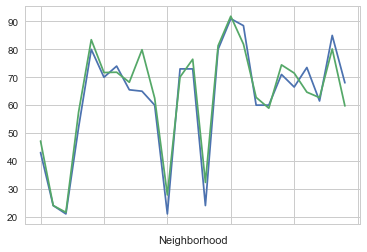

In [19]:
train['LotFrontage'].groupby(train['Neighborhood']).median().plot()
train['LotFrontage'].groupby(train['Neighborhood']).mean().plot()
#test['LotFrontage'].groupby(test["Neighborhood"]).median().plot()
#test['LotFrontage'].groupby(test["Neighborhood"]).mean().plot()


In [20]:
train['LotFrontage'].fillna(train.groupby('Neighborhood')['LotFrontage'].transform('median'), inplace=True)
test['LotFrontage'].fillna(test.groupby('Neighborhood')['LotFrontage'].transform('median'), inplace=True)


In [21]:
missing_data_train = missing_data_fun(train)
missing_data_train

,Total,Percent
MasVnrArea,8,0.005479
Electrical,1,0.000685


In [22]:
missing_data_test = missing_data_fun(test)
missing_data_test

,Total,Percent
MasVnrArea,15,0.010281
MSZoning,4,0.002742
Functional,2,0.001371
BsmtFullBath,2,0.001371
Exterior1st,1,0.000685
GarageCars,1,0.000685
GarageArea,1,0.000685
Exterior2nd,1,0.000685
BsmtUnfSF,1,0.000685
BsmtFinSF1,1,0.000685


In [23]:
#train[train.MasVnrArea.isnull()].loc[:, ['MasVnrType', 'MasVnrArea']]
#test[test.MasVnrArea.isnull()].loc[:, ['MasVnrType', 'MasVnrArea']]

def is_missingMasVnrArea(MasVnrType,MasVnrArea):    
    if pd.isnull(MasVnrArea) and MasVnrType == 'None':        
        return 0
    else:
        return MasVnrArea
    
train['MasVnrArea'] = train.apply(lambda x: is_missingGarageYrBlt(x['MasVnrType'], x['MasVnrArea']),axis=1)
test['MasVnrArea'] = test.apply(lambda x: is_missingGarageYrBlt(x['MasVnrType'], x['MasVnrArea']),axis=1)


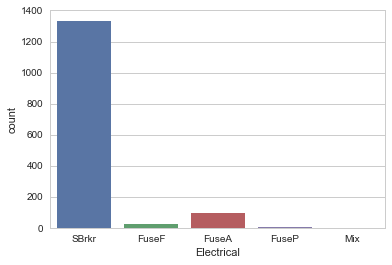

In [24]:
sns.countplot(train['Electrical'])

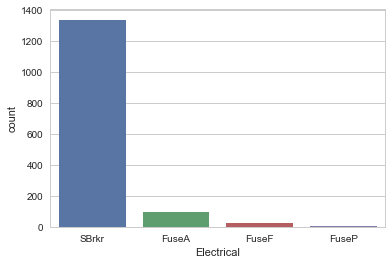

In [25]:
sns.countplot(test['Electrical'])

In [26]:
train.Electrical.fillna('SBrkr',inplace=True)
test.Electrical.fillna('SBrkr',inplace=True)

train.Functional.fillna('Typ',inplace=True)
test.Functional.fillna('Typ',inplace=True)

train.BsmtFullBath.fillna(0,inplace=True)
test.BsmtFullBath.fillna(0,inplace=True)

train.BsmtHalfBath.fillna(0,inplace=True)
test.BsmtHalfBath.fillna(0,inplace=True)

train.BsmtUnfSF.fillna(0,inplace=True)
test.BsmtUnfSF.fillna(0,inplace=True)

train.TotalBsmtSF.fillna(0,inplace=True)
test.TotalBsmtSF.fillna(0,inplace=True)

train.BsmtFinSF1.fillna(0,inplace=True)
test.BsmtFinSF1.fillna(0,inplace=True)

train.BsmtFinSF2.fillna(0,inplace=True)
test.BsmtFinSF2.fillna(0,inplace=True)

train.GarageCars.fillna(0,inplace=True)
test.GarageCars.fillna(0,inplace=True)

train.GarageArea.fillna(0,inplace=True)
test.GarageArea.fillna(0,inplace=True)


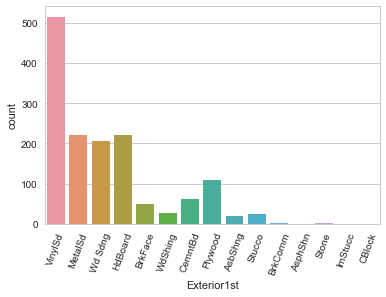

In [27]:
plt.xticks(rotation =70)
sns.countplot(train['Exterior1st'])
#sns.countplot(test['Exterior1st'])


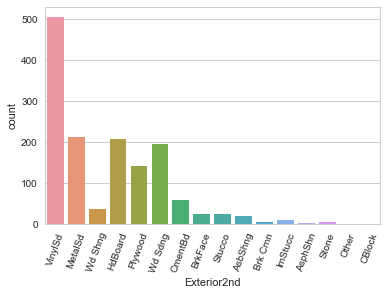

In [28]:
plt.xticks(rotation =70)
sns.countplot(train['Exterior2nd'])

In [29]:
train.Exterior1st.fillna('VinylSd',inplace=True)
test.Exterior1st.fillna('VinylSd',inplace=True)

train.Exterior2nd.fillna('VinylSd',inplace=True)
test.Exterior2nd.fillna('VinylSd',inplace=True)

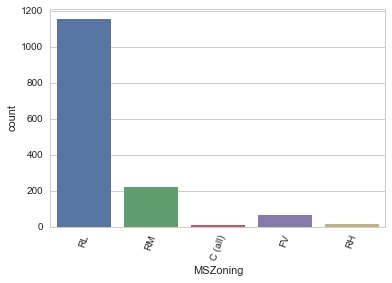

In [30]:
plt.xticks(rotation =70)
sns.countplot(train['MSZoning'])

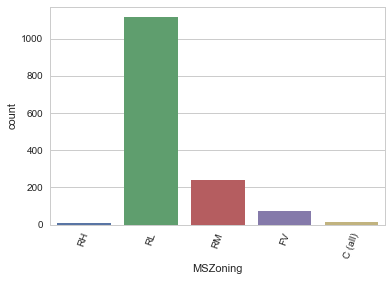

In [31]:
plt.xticks(rotation =70)
sns.countplot(test['MSZoning'])

In [32]:
train.MSZoning.fillna('RL',inplace=True)
test.MSZoning.fillna('RL',inplace=True)

In [33]:
missing_data_train = missing_data_fun(train)
missing_data_train

,Total,Percent


In [34]:
missing_data_test = missing_data_fun(test)
missing_data_test

,Total,Percent


In [35]:
#train.MSSubClass.head()

In [36]:
#train.MSSubClass.unique()

In [37]:
'''
Change to categorical cariable.
ExterQual, ExterCond, BsmtQual, BsmtCond, BsmtExposure,
BsmtFinType1,BsmtFinType2, HeatingQC, KitchenQual, 
FireplaceQu, GarageQual, GarageCond, PoolQC

MoSold, GarageYrBlt, MSSubClass

'''
def CategoricalData(df):
    #Categorical factors that should be numeric
    df.ExterQual = df.ExterQual.map({'None': 0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
    df.ExterCond = df.ExterCond.map({'None': 0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
    df.BsmtQual = df.BsmtQual.map({'None': 0,'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
    df.BsmtCond = df.BsmtCond.map({'None': 0,'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
    df.BsmtExposure = df.BsmtExposure.map({'None': 0,'NA':0,'No':1,'Mn':2, 'Av':3, 'Gd':4})
    df.BsmtFinType1 = df.BsmtFinType1.map({'None': 0,'NA':0,'Unf':1,'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5,'GLQ':6})
    df.BsmtFinType2 = df.BsmtFinType2.map({'None': 0,'NA':0,'Unf':1,'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5,'GLQ':6})
    df.HeatingQC = df.HeatingQC.map({'None': 0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
    df.KitchenQual = df.KitchenQual.map({'None': 0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
    df.FireplaceQu = df.FireplaceQu.map({'None': 0,'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
    df.GarageQual = df.GarageQual.map({'None': 0,'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
    df.GarageCond = df.GarageCond.map({'None': 0,'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
    df.PoolQC = df.PoolQC.map({'None': 0,'NA':0,'Fa':1,'TA':2, 'Gd':3, 'Ex':4})
    df.CentralAir = df.CentralAir.map({'N':0 , 'Y':1})
    
    return df

In [38]:
train = CategoricalData(train)
test = CategoricalData(test)

In [39]:
#train['BsmtQual'].head()

In [40]:
#train.loc[:,'MoSold']
train.groupby('MoSold').SalePrice.agg(['count','mean'])

,count,mean
MoSold,,
1,58,183256.258621
2,52,177882.000000
3,106,183253.924528
4,141,171503.262411
5,204,172307.269608
6,253,177395.735178
7,234,186331.192308
8,122,184651.827869
9,63,195683.206349


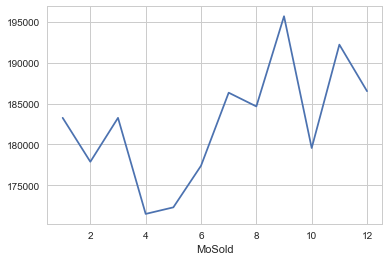

In [41]:
#sns.set(style="darkgrid")

#sns.lineplot(data = temp)

train['SalePrice'].groupby(train['MoSold']).agg('mean').plot()

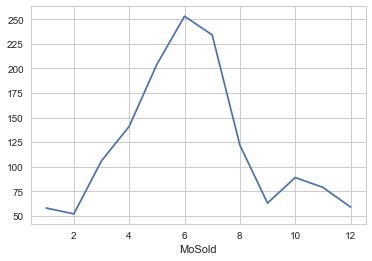

In [42]:
train['SalePrice'].groupby(train['MoSold']).agg('count').plot()

In [43]:
#Count and Saleprice are inversery proportional
sale_price_month = train['SalePrice'].groupby(train['MoSold']).mean().to_dict()
train["MonthlyMeanPrice"] = train["MoSold"].replace(sale_price_month)
test["MonthlyMeanPrice"] = test["MoSold"].replace(sale_price_month)

In [44]:
#month is int, convert it to String
sale_month = {"1": 0, "2": 0, "3": 0, "4": 0, "5": 0, "6": 0, "7": 0, "8": 0, "9": 0, "10": 0, "11": 0, "12": 0}

#train['MoSold'].dtype
for m in train['MoSold'].values:
    sale_month[str(m)] = sale_month[str(m)] + 1
train['MoSold'] = train['MoSold'].map(lambda m : str(m))
train["MonthlyCount"] = train["MoSold"].replace(sale_month)


In [45]:
sale_month = {"1": 0, "2": 0, "3": 0, "4": 0, "5": 0, "6": 0, "7": 0, "8": 0, "9": 0, "10": 0, "11": 0, "12": 0}

for m in test['MoSold'].values:
    sale_month[str(m)] = sale_month[str(m)] + 1
test['MoSold'] = test['MoSold'].map(lambda m : str(m))
test["MonthlyCount"] = test["MoSold"].replace(sale_month)

In [46]:
test.loc[:,['GarageYrBlt','YearBuilt', 'YearRemodAdd', 'YrSold']].head()


,GarageYrBlt,YearBuilt,YearRemodAdd,YrSold
0,1961.0,1961,1961,2010
1,1958.0,1958,1958,2010
2,1997.0,1997,1998,2010
3,1998.0,1998,1998,2010
4,1992.0,1992,1992,2010


In [47]:
train_built_year_data = pd.DataFrame(train[['YearBuilt', 'GarageYrBlt']].loc[train.GarageYrBlt != 0,:])
test_built_year_data =  pd.DataFrame(test[['YearBuilt', 'GarageYrBlt']].loc[test.GarageYrBlt != 0,:])

built_year_data = pd.concat([train_built_year_data.loc[:, :], test_built_year_data])
built_year_data['GarageYrBlt'] = built_year_data['GarageYrBlt'].map(lambda g : int(g))
built_year_data['GarageYrBlt'].corr(built_year_data['YearBuilt'])

#High Correralation b/w GarageYrBlt & YearBuilt

0.8348123731631015

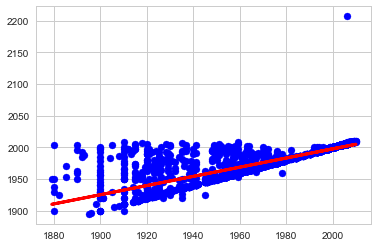

In [48]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
garage_year = built_year_data.loc[:,'GarageYrBlt'].values
built_year = built_year_data.loc[:,'YearBuilt'].values

length = garage_year.shape[0]
garage_year = garage_year.reshape(length, 1)
built_year = built_year.reshape(length, 1)

# Train the model using the training sets
regr.fit(built_year, garage_year)
plt.scatter(built_year, garage_year,  color='blue')
plt.plot(built_year, regr.predict(built_year), color='red',
         linewidth=3)

In [49]:
train['GarageYrBlt'] = train.apply(lambda row : int(regr.predict(row['YearBuilt']))
                                                      if row['GarageYrBlt'] == 'NA' else int(row['GarageYrBlt']),
                                                       axis=1)
test['GarageYrBlt'] = test.apply(lambda row : int(regr.predict(row['YearBuilt']))
                                                      if row['GarageYrBlt'] == 'NA' else int(row['GarageYrBlt']),
                                                       axis=1)

In [50]:
#Remodeling attribute
train['RemodYears'] = train.YearRemodAdd - train.YearBuilt
train['isRemodeled'] = (train.YearRemodAdd != train.YearBuilt) * 1
train["isRecentRemodel"] = (train.YearRemodAdd == train.YrSold) * 1

test['RemodYears'] = test.YearRemodAdd - test.YearBuilt
test['isRemodeled'] = (test.YearRemodAdd != test.YearBuilt) * 1
test['isRecentRemodel'] = (test.YearRemodAdd == test.YrSold) * 1

#train.loc[:,['YearRemodAdd','YearBuilt', 'RemodYears', 'isRemodeled', 'isRecentRemodel']]

In [51]:
train['GarageBltDiff'] = train.GarageYrBlt - train.YearBuilt
test['GarageBltDiff'] = test.GarageYrBlt - test.YearBuilt


In [52]:
#Property age
import datetime
now = datetime.datetime.now()


train['PropertyAge'] = now.year - train.YearBuilt
train['RemodAge'] = now.year - train.YearRemodAdd
train['GarageAge'] = now.year - train.GarageYrBlt

test['PropertyAge'] = now.year - test.YearBuilt
test['RemodAge'] = now.year - test.YearRemodAdd
test['GarageAge'] = now.year - test.GarageYrBlt

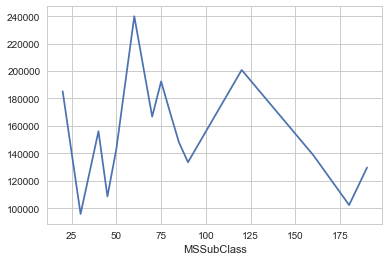

In [53]:
 '''
 MSSubClass is grade it's must be encoded
'''
    
train['SalePrice'].groupby(train['MSSubClass']).mean().plot()


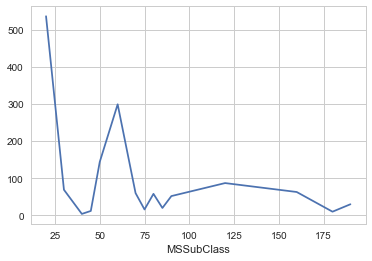

In [54]:

train['SalePrice'].groupby(train['MSSubClass']).agg('count').plot()

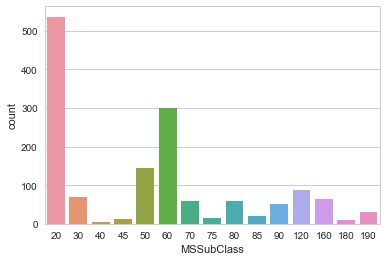

In [55]:
sns.countplot(train['MSSubClass'])

In [56]:

train["NewDwelling"] = train["MSSubClass"].replace(
    {20: 1, 30: 0, 40: 0, 45: 0,50: 0, 60: 1, 70: 0, 75: 0, 80: 0, 85: 0,
     90: 0, 120: 1, 150: 0, 160: 1, 180: 0, 190: 0})
test["NewDwelling"] = test["MSSubClass"].replace(
    {20: 1, 30: 0, 40: 0, 45: 0,50: 0, 60: 1, 70: 0, 75: 0, 80: 0, 85: 0,
     90: 0, 120: 1, 150: 0, 160: 1, 180: 0, 190: 0})

train['MSSubClass'] = train['MSSubClass'].replace({20: 'MS20',30: 'MS30',40: 'MS40',45: 'MS45',
                                                   50: 'MS50',60: 'MS60',70: 'MS70',75: 'MS75',
                                                   80: 'MS80',85: 'MS85',90: 'MS90',120: 'MS120',
                                                   150: 'MS150',160: 'MS160',180: 'MS180',190: 'MS190'})

test['MSSubClass'] = test['MSSubClass'].replace({20: 'MS20',30: 'MS30',40: 'MS40',45: 'MS45',
                                                   50: 'MS50',60: 'MS60',70: 'MS70',75: 'MS75',
                                                   80: 'MS80',85: 'MS85',90: 'MS90',120: 'MS120',
                                                   150: 'MS150',160: 'MS160',180: 'MS180',190: 'MS190'})




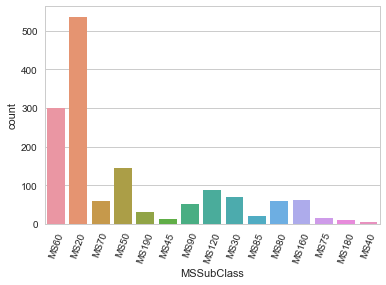

In [57]:
plt.xticks(rotation =70)
sns.countplot(train['MSSubClass'])

In [58]:
#correction in Data
#Column  Exterior2nd
#['Brk Cmn' 'CmentBd' 'Wd Shng']
train.Exterior2nd = train.Exterior2nd.replace('Brk Cmn', 'BrkComm')
train.Exterior2nd = train.Exterior2nd.replace('CmentBd', 'CemntBd')
train.Exterior2nd = train.Exterior2nd.replace('Wd Shng', 'Wd Sdng')

test.Exterior2nd = test.Exterior2nd.replace('Brk Cmn', 'BrkComm')
test.Exterior2nd = test.Exterior2nd.replace('CmentBd', 'CemntBd')
test.Exterior2nd = test.Exterior2nd.replace('Wd Shng', 'Wd Sdng')


In [59]:
#train


In [60]:
train_X = train.loc[:,train.columns != 'SalePrice' ]
train_Y = train.loc[:,train.columns =='SalePrice']
test_df = test.iloc[:,:]




In [61]:
#train_X

In [62]:
from sklearn.preprocessing import LabelBinarizer

def LabelBinarizerConverter(col_name, col_label):
    global train_X
    global test_df
    lb_style = LabelBinarizer()
    lb_style.fit(col_label)
    
    #Handle in train dataframe
    index_col = train_X.columns.values.tolist().index(col_name)
    lb_results = lb_style.transform(train_X[col_name])
    df_new = pd.DataFrame(lb_results, columns=lb_style.classes_ )
    df_new = df_new.iloc[:, 1:]

    df_new.rename(columns= lambda x: col_name +'_'+ x,inplace = True )
    train_new= pd.concat([train_X.iloc[:,:index_col] , df_new], axis=1)
    train_new1 = pd.concat([train_new , train_X.iloc[:,index_col+1:]]  , axis=1)
    train_X = train_new1
    
    #Handle in test dataframe
    index_col = test_df.columns.values.tolist().index(col_name)
    lb_results = lb_style.transform(test_df[col_name])
    df_new = pd.DataFrame(lb_results, columns=lb_style.classes_ )
    df_new = df_new.iloc[:, 1:]


    df_new.rename(columns= lambda x: col_name +'_'+ x,inplace = True )
    test_new= pd.concat([test_df.iloc[:,:index_col] , df_new], axis=1)
    test_new1 = pd.concat([test_new , test_df.iloc[:,index_col+1:]]  , axis=1)
    test_df = test_new1

In [63]:
test_df.shape

(1459, 90)

In [64]:
train_X.shape

(1460, 90)

In [65]:
#train_X

In [66]:

LabelBinarizerConverter('MSSubClass', ['MS20', 'MS30', 'MS40', 'MS45', 'MS50','MS60',
                                       'MS70', 'MS75','MS80', 
                                       'MS85', 'MS90', 'MS120','MS150','MS160', 'MS180','MS190'])



In [67]:

'''LabelBinarizerConverter('MSSubClass', ['MS20', 'MS30', 'MS40', 'MS45', 'MS50','MS60',
                                       'MS70', 'MS75','MS80', 
                                       'MS85', 'MS90', 'MS120','MS150','MS160', 'MS180','MS190'])'''


LabelBinarizerConverter('MSZoning',['A','C (all)','FV','I','RH','RL', 'RP', 'RM'])

LabelBinarizerConverter('Street',['None','Pave', 'Grvl'])


LabelBinarizerConverter('Alley',['None', 'Grvl', 'Pave'])
LabelBinarizerConverter('LotShape',['Reg', 'IR1', 'IR2', 'IR3'])
LabelBinarizerConverter('LandContour',['Lvl', 'Bnk', 'HLS', 'Low'] )
LabelBinarizerConverter('Utilities',['None', 'ELO', 'NoSeWa', 'NoSewr', 'AllPub'])
LabelBinarizerConverter('LotConfig', ['Inside', 'Corner', 'CulDSac','FR2', 'FR3'])
LabelBinarizerConverter('LandSlope',['Gtl', 'Mod', 'Sev'])
LabelBinarizerConverter('Neighborhood',['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr',
                        'CollgCr', 'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR',
                        'MeadowV', 'Mitchel', 'NAmes','NoRidge', 'NPkVill', 'NridgHt',
                        'NWAmes','OldTown','SWISU','Sawyer', 'SawyerW','Somerst',
                        'StoneBr', 'Timber', 'Veenker'])
LabelBinarizerConverter('Condition1', ['Artery', 'Feedr', 'Norm', 'RRNn', 'RRAn', 'PosN', 'PosA', 'RRNe', 'RRAe'])
LabelBinarizerConverter('Condition2',['Artery', 'Feedr', 'Norm', 'RRNn', 'RRAn', 'PosN', 'PosA', 'RRNe', 'RRAe'])
LabelBinarizerConverter('BldgType',['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs'])
LabelBinarizerConverter('HouseStyle', ['1Story', '1.5Fin', '1.5Unf', '2Story', '2.5Fin', '2.5Unf',
                                       'SFoyer', 'SLvl'])
LabelBinarizerConverter('RoofStyle',['Flat', 'Gable', 'Gambrel', 'Hip', 'Mansard', 'Shed'] )
LabelBinarizerConverter('RoofMatl',['ClyTile', 'CompShg', 'Membran', 'Metal', 'Roll', 'Tar&Grv', 'WdShake', 'WdShngl'])

LabelBinarizerConverter('Exterior1st',['AsbShng', 'AsphShn', 'BrkComm', 'BrkFace', 'CBlock', 'CemntBd', 'HdBoard','ImStucc', 'MetalSd','Other', 'Plywood', 'PreCast','Stone', 'Stucco', 'VinylSd', 'Wd Sdng', 'WdShing'])
LabelBinarizerConverter('Exterior2nd',['AsbShng', 'AsphShn', 'BrkComm', 'BrkFace', 'CBlock', 'CemntBd', 'HdBoard','ImStucc', 'MetalSd','Other', 'Plywood', 'PreCast','Stone', 'Stucco','VinylSd', 'Wd Sdng', 'WdShing'])

LabelBinarizerConverter('MasVnrType',['BrkCmn', 'BrkFace', 'CBlock', 'None', 'Stone' ])
LabelBinarizerConverter('Foundation',['BrkTil', 'CBlock', 'PConc', 'Slab', 'Stone' ,'Wood'])
LabelBinarizerConverter('Heating',['Floor', 'GasA', 'GasW', 'Grav', 'OthW' ,'Wall'])
LabelBinarizerConverter('Electrical',['SBrkr', 'FuseA', 'FuseF', 'FuseP', 'Mix' ]) 
LabelBinarizerConverter('Functional',['Typ', 'Min1', 'Min2', 'Mod', 'Maj1','Maj2','Sev','Sal' ])
LabelBinarizerConverter('GarageType',['2Types', 'Attchd', 'Basment', 'BuiltIn', 'CarPort','Detchd','None' ])
LabelBinarizerConverter('GarageFinish',['Fin', 'RFn', 'Unf', 'None' ])
LabelBinarizerConverter('PavedDrive', ['Y', 'N', 'P' ])
LabelBinarizerConverter('Fence',['GdPrv', 'MnPrv', 'GdWo','MnWw','None' ])
LabelBinarizerConverter('MiscFeature',['Elev', 'Gar2', 'Othr','Shed','TenC','None' ])
LabelBinarizerConverter('SaleType',['WD', 'CWD', 'VWD','New','COD','Con','ConLw', 'ConLI', 'ConLD', 'Oth', 'None'])
LabelBinarizerConverter('SaleCondition',['Normal', 'Abnorml', 'AdjLand','Alloca','Family','Partial'])
LabelBinarizerConverter('MoSold',['2', '5', '9', '12', '10', '8', '11', '4', '1', '7', '3', '6'])


In [68]:
train_X.shape

(1460, 267)

In [69]:
test_df.shape

(1459, 267)

In [70]:
 def LabelEncoder_fun(df):
    le_subClass = LabelEncoder()
    le_subClass.fit(['MS20', 'MS30', 'MS40', 'MS45', 'MS50','MS60', 
                              'MS70', 'MS75','MS80', 'MS85', 'MS90', 'MS120',
                              'MS150','MS160', 'MS180','MS190'])
    df[:,1] = le_subClass.transform(df[:, 1])
    
    le_MSZoning = LabelEncoder()
    le_MSZoning.fit(['A','C (all)','FV','I','RH','RL', 'RP', 'RM'])
    df[:,2] = le_MSZoning.transform(df[:, 2])
    
    le_Street = LabelEncoder()
    le_Street.fit(['Pave', 'Grvl'])
    df[:,5] = le_Street.transform(df[:, 5])
    
    le_Alley = LabelEncoder()
    le_Alley.fit(['None', 'Grvl', 'Pave'])
    df[:,6] = le_Alley.transform(df[:, 6])
    
    le_LotShape = LabelEncoder()
    le_LotShape.fit(['Reg', 'IR1', 'IR2', 'IR3'])
    df[:,7] = le_LotShape.transform(df[:, 7])
    
    le_LandContour = LabelEncoder()
    le_LandContour.fit(['Lvl', 'Bnk', 'HLS', 'Low'])
    df[:,8] = le_LandContour.transform(df[:, 8])
    
    le_Utilities = LabelEncoder()
    le_Utilities.fit(['None', 'ELO', 'NoSeWa', 'NoSewr', 'AllPub'])
    df[:,9] = le_Utilities.transform(df[:, 9])
    
    le_LotConfig = LabelEncoder()
    le_LotConfig.fit(['Inside', 'Corner', 'CulDSac','FR2', 'FR3'])
    df[:,10] = le_LotConfig.transform(df[:, 10])
    
    le_LandSlope = LabelEncoder()
    le_LandSlope.fit(['Gtl', 'Mod', 'Sev'])
    df[:,11] = le_LandSlope.transform(df[:, 11])
    
    le_Neighborhood = LabelEncoder()
    le_Neighborhood.fit(['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr',
                        'CollgCr', 'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR',
                        'MeadowV', 'Mitchel', 'NAmes','NoRidge', 'NPkVill', 'NridgHt',
                        'NWAmes','OldTown','SWISU','Sawyer', 'SawyerW','Somerst',
                        'StoneBr', 'Timber', 'Veenker'])
    df[:,12] = le_Neighborhood.transform(df[:, 12])
    
    le_Condition1 = LabelEncoder()
    le_Condition1.fit(['Artery', 'Feedr', 'Norm', 'RRNn', 'RRAn', 'PosN', 'PosA', 'RRNe', 'RRAe'])
    df[:,13] = le_Condition1.transform(df[:, 13])
    
    le_Condition2 = LabelEncoder()
    le_Condition2.fit(['Artery', 'Feedr', 'Norm', 'RRNn', 'RRAn', 'PosN', 'PosA', 'RRNe', 'RRAe'])
    df[:,14] = le_Condition2.transform(df[:, 14])
    
    le_BldgType = LabelEncoder()
    le_BldgType.fit(['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs'])
    df[:,15] = le_BldgType.transform(df[:, 15])
    
    le_HouseStyle = LabelEncoder()
    le_HouseStyle.fit(['1Story', '1.5Fin', '1.5Unf', '2Story', '2.5Fin', '2.5Unf',
                      'SFoyer', 'SLvl'])
    df[:,16] = le_HouseStyle.transform(df[:, 16])
    
    le_RoofStyle = LabelEncoder()
    le_RoofStyle.fit(['Flat', 'Gable', 'Gambrel', 'Hip', 'Mansard', 'Shed'])
    df[:,21] = le_RoofStyle.transform(df[:, 21])
    
    le_RoofMatl = LabelEncoder()
    le_RoofMatl.fit(['ClyTile', 'CompShg', 'Membran', 'Metal', 'Roll', 'Tar&Grv', 'WdShake', 'WdShngl'])
    df[:,22] = le_RoofMatl.transform(df[:, 22])
    
    le_Exterior1st = LabelEncoder()
    le_Exterior1st.fit(['AsbShng', 'AsphShn', 'BrkComm', 'BrkFace', 'CBlock', 'CemntBd', 'HdBoard', 
                        'ImStucc', 'MetalSd','Other', 'Plywood', 'PreCast','Stone', 'Stucco', 
                        'VinylSd', 'Wd Sdng', 'WdShing'])
    df[:,23] = le_Exterior1st.transform(df[:, 23])
   
    le_Exterior2nd = LabelEncoder()
    le_Exterior2nd.fit(['AsbShng', 'AsphShn', 'BrkComm', 'BrkFace', 'CBlock', 'CemntBd', 'HdBoard', 
                        'ImStucc', 'MetalSd','Other', 'Plywood', 'PreCast','Stone', 'Stucco', 
                        'VinylSd', 'Wd Sdng', 'WdShing'])
    df[:,24] = le_Exterior2nd.transform(df[:, 24])
    
    le_MasVnrType =   LabelEncoder()
    le_MasVnrType.fit(['BrkCmn', 'BrkFace', 'CBlock', 'None', 'Stone' ])
    df[:,25] = le_MasVnrType.transform(df[:, 25])
    
    le_Foundation =   LabelEncoder()
    le_Foundation.fit(['BrkTil', 'CBlock', 'PConc', 'Slab', 'Stone' ,'Wood'])
    df[:,29] = le_Foundation.transform(df[:, 29])
    
    le_Heating =   LabelEncoder()
    le_Heating.fit(['Floor', 'GasA', 'GasW', 'Grav', 'OthW' ,'Wall'])
    df[:,39] = le_Heating.transform(df[:, 39])

    le_Electrical =   LabelEncoder()
    le_Electrical.fit(['SBrkr', 'FuseA', 'FuseF', 'FuseP', 'Mix' ])
    df[:,42] = le_Electrical.transform(df[:, 42])

    le_Functional =   LabelEncoder()
    le_Functional.fit(['Typ', 'Min1', 'Min2', 'Mod', 'Maj1','Maj2','Sev','Sal' ])
    df[:,55] = le_Functional.transform(df[:, 55])
    
    le_GarageType =   LabelEncoder()
    le_GarageType.fit(['2Types', 'Attchd', 'Basment', 'BuiltIn', 'CarPort','Detchd','None' ])
    df[:,58] = le_GarageType.transform(df[:, 58])
    
    le_GarageFinish =   LabelEncoder()
    le_GarageFinish.fit(['Fin', 'RFn', 'Unf', 'None' ])
    df[:,60] = le_GarageFinish.transform(df[:, 60])
    
    le_PavedDrive =   LabelEncoder()
    le_PavedDrive.fit(['Y', 'N', 'P' ])
    df[:,65] = le_PavedDrive.transform(df[:, 65])

    le_Fence =   LabelEncoder()
    le_Fence.fit(['GdPrv', 'MnPrv', 'GdWo','MnWw','None' ])
    df[:,73] = le_Fence.transform(df[:, 73])
    
    le_MiscFeature =   LabelEncoder()
    le_MiscFeature.fit(['Elev', 'Gar2', 'Othr','Shed','TenC','None' ])
    df[:,74] = le_MiscFeature.transform(df[:, 74])
    
    le_SaleType =   LabelEncoder()
    le_SaleType.fit(['WD', 'CWD', 'VWD','New','COD','Con','ConLw', 'ConLI', 'ConLD', 'Oth', 'None'])
    df[:,78] = le_SaleType.transform(df[:, 78])
    
    le_SaleCondition =   LabelEncoder()
    le_SaleType.fit(['Normal', 'Abnorml', 'AdjLand','Alloca','Family','Partial'])
    df[:,79] = le_SaleType.transform(df[:, 79])
    
    return df
#Arun

In [71]:
#train_X = LabelEncoder_fun(train_X)
#test_df = LabelEncoder_fun(test_df)
train_Y.shape

(1460, 1)

In [72]:
train_X.shape

(1460, 267)

In [73]:
train_X.drop(columns=['Id'], inplace = True)
test_df.drop(columns=['Id'], inplace = True)

In [74]:
test_df.shape

(1459, 266)

In [75]:
train_X.shape

(1460, 266)

<Figure size 720x720 with 0 Axes>

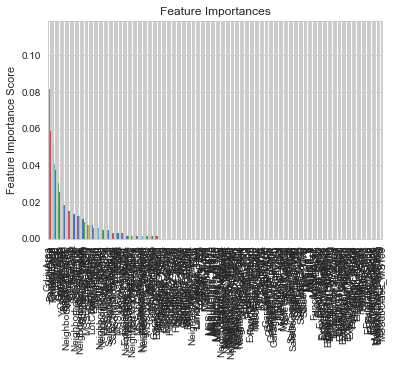

<Figure size 720x720 with 0 Axes>

In [76]:
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score

#train_X.drop(['Id'], inplace = True)
xgb_regressor = XGBRegressor(seed=10)
xgb_regressor.fit(train_X, train_Y)



feature_importances = pd.Series(xgb_regressor.feature_importances_, train_X.columns.values)
feature_importances = feature_importances.sort_values(ascending=False)
# feature_importances= feature_importances.head(40)
feature_importances.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')
plt.figure(figsize=(10,10))

In [77]:
feature_importances

GrLivArea               0.113122
LotArea                 0.081448
BsmtFinSF1              0.058824
OverallQual             0.052790
OverallCond             0.051282
TotalBsmtSF             0.040724
2ndFlrSF                0.037707
LotFrontage             0.036199
1stFlrSF                0.030166
GarageYrBlt             0.025641
GarageArea              0.021116
OpenPorchSF             0.018100
YearRemodAdd            0.018100
BsmtExposure            0.018100
BsmtUnfSF               0.016591
Neighborhood_Crawfor    0.015083
SaleType_New            0.015083
WoodDeckSF              0.015083
GarageCars              0.013575
KitchenQual             0.013575
YearBuilt               0.013575
ScreenPorch             0.013575
Neighborhood_StoneBr    0.013575
Functional_Typ          0.012066
BsmtQual                0.012066
Exterior1st_BrkFace     0.012066
Neighborhood_Edwards    0.010558
RemodYears              0.010558
Condition1_Norm         0.010558
MSZoning_C (all)        0.009050
          

In [78]:
model =XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42) 


In [79]:
#every_column_except_y= [col for col in train_dataset.columns if col not in ['SalePrice','Id']]
model.fit(train_X,train_Y)

#OrderedDict(sorted(model.booster().get_fscore().items(), key=lambda t: t[1], reverse=True))

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_delta_step=0,
       max_depth=3, min_child_weight=1.5, missing=None, n_estimators=10000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0.75, reg_lambda=0.45, scale_pos_weight=1, seed=42,
       silent=True, subsample=0.6)

In [80]:
from collections import OrderedDict
OrderedDict(sorted(model.get_booster().get_fscore().items(), key=lambda t: t[1], reverse=True))


OrderedDict([('LotArea', 4429),
             ('BsmtUnfSF', 3563),
             ('GrLivArea', 3192),
             ('1stFlrSF', 2791),
             ('LotFrontage', 2623),
             ('BsmtFinSF1', 2549),
             ('GarageArea', 2498),
             ('TotalBsmtSF', 2463),
             ('YearBuilt', 1830),
             ('TotRmsAbvGrd', 1774),
             ('MasVnrArea', 1715),
             ('OpenPorchSF', 1622),
             ('WoodDeckSF', 1594),
             ('2ndFlrSF', 1461),
             ('GarageYrBlt', 1386),
             ('YearRemodAdd', 1346),
             ('MonthlyMeanPrice', 1091),
             ('MonthlyCount', 989),
             ('YrSold', 874),
             ('PropertyAge', 816),
             ('Neighborhood_CollgCr', 729),
             ('BsmtExposure', 727),
             ('GarageAge', 677),
             ('OverallQual', 674),
             ('RemodYears', 666),
             ('RemodAge', 637),
             ('BedroomAbvGr', 574),
             ('GarageBltDiff', 568),
             

In [81]:
#Let's remove the less important ones 
most_relevant_features= list( dict((k, v) for k, v in model.get_booster().get_fscore().items() if v >= 10).keys())
print(most_relevant_features)

['ExterQual', 'FireplaceQu', 'TotalBsmtSF', 'LotArea', 'GarageArea', '2ndFlrSF', 'GrLivArea', 'YearBuilt', 'GarageCars', '1stFlrSF', 'Fireplaces', 'RemodAge', 'KitchenQual', 'BsmtFinSF1', 'BsmtQual', 'KitchenAbvGr', 'OverallQual', 'OpenPorchSF', 'FullBath', 'MasVnrArea', 'LotFrontage', 'TotRmsAbvGrd', 'GarageYrBlt', 'YearRemodAdd', 'MonthlyCount', 'BsmtFinType1', 'HalfBath', 'WoodDeckSF', 'BedroomAbvGr', 'MSZoning_RM', 'GarageType_Attchd', 'OverallCond', 'BsmtExposure', 'GarageQual', 'CentralAir', 'BsmtHalfBath', 'SaleType_WD', 'MSSubClass_MS60', 'BsmtUnfSF', 'Condition1_Norm', 'GarageBltDiff', 'Neighborhood_Edwards', 'SaleType_New', 'MSZoning_RL', 'BsmtFullBath', 'GarageCond', 'Neighborhood_Crawfor', 'PoolQC', 'Condition1_PosN', 'SaleCondition_Normal', 'MSSubClass_MS70', 'PropertyAge', 'ExterCond', 'SaleCondition_Family', 'isRemodeled', 'MSSubClass_MS80', 'Neighborhood_StoneBr', 'MasVnrType_BrkFace', 'LotShape_IR3', 'ScreenPorch', 'Neighborhood_NoRidge', 'Exterior1st_Stucco', 'PoolAre

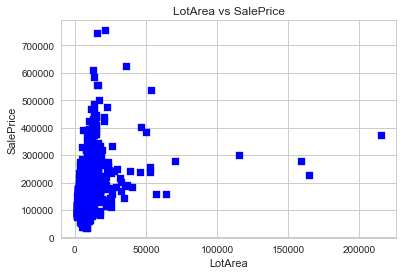

In [82]:
plt.scatter(train_X.LotArea, train_Y.SalePrice, c = "blue", marker = "s")
plt.title("LotArea vs SalePrice")
plt.xlabel("LotArea")
plt.ylabel("SalePrice")
plt.show()

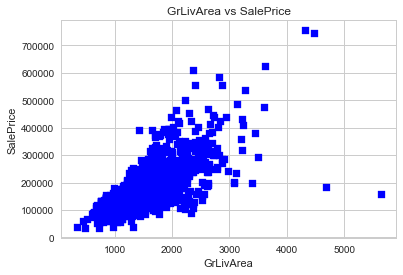

In [83]:
plt.scatter(train_X.GrLivArea, train_Y.SalePrice, c = "blue", marker = "s")
plt.title("GrLivArea vs SalePrice")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()

In [84]:
train_x=train_X[most_relevant_features]
train_y=train_Y['SalePrice']


In [85]:
len(most_relevant_features)

203

In [86]:
test_df.columns

Index(['MSSubClass_MS150', 'MSSubClass_MS160', 'MSSubClass_MS180',
       'MSSubClass_MS190', 'MSSubClass_MS20', 'MSSubClass_MS30',
       'MSSubClass_MS40', 'MSSubClass_MS45', 'MSSubClass_MS50',
       'MSSubClass_MS60',
       ...
       'MonthlyMeanPrice', 'MonthlyCount', 'RemodYears', 'isRemodeled',
       'isRecentRemodel', 'GarageBltDiff', 'PropertyAge', 'RemodAge',
       'GarageAge', 'NewDwelling'],
      dtype='object', length=266)

In [87]:

train_X = train_X[train_X.GrLivArea < 8.25]
train_X = train_X[train_X.LotArea < 11.5]
train_Y = train_Y[train_Y.SalePrice<13]
train_Y = train_Y[train_Y.SalePrice>10.5]


In [88]:
best_model = XGBRegressor(colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5,
                          n_estimators=10000, reg_alpha=0.75, reg_lambda=0.45, subsample=0.6,seed=42)
best_model.fit(train_x,train_y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_delta_step=0,
       max_depth=3, min_child_weight=1.5, missing=None, n_estimators=10000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0.75, reg_lambda=0.45, scale_pos_weight=1, seed=42,
       silent=True, subsample=0.6)

In [89]:

test_relevant = test_df.loc[:,most_relevant_features]
test_relevant.shape

test_predict = best_model.predict(test_relevant)

In [90]:
#pd.DataFrame(test_predict)

filename = 'submission.csv'
pd.DataFrame({'Id': test.Id, 'SalePrice': test_predict}).to_csv(filename, index=False)



In [91]:
#pd.DataFrame({'Id': test.Id, 'SalePrice': test_predict})

,Id,SalePrice
0,1461,124847.500000
1,1462,174801.718750
2,1463,192165.265625
3,1464,198786.656250
4,1465,176868.093750
5,1466,167618.515625
6,1467,174399.078125
7,1468,170246.281250
8,1469,176545.859375
9,1470,135439.531250
